# Challenge Feedback analysis
### Naive Bayes Classifier
Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a <u>sentiment analysis</u>, classifying whether feedback left on a website is either positive or negative.

https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit 

### Data Set Information:
==
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015 
Please cite the paper if you want to use it :) 

It contains sentences labelled with positive or negative sentiment. 

======= 
### Format: 

sentence score

======= 
### Details: 
======= 
Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields: 

imdb.com / 
amazon.com / 
yelp.com 

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected. 



### Attribute Information:
==

The attributes are text sentences, extracted from reviews of products, movies, and restaurants

In [179]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
# Process the amazon datafile:
data_amz = pd.read_csv('U2-sentiment labelled sentences\\sentiment labelled sentences\\amazon_cells_labelled.txt'
                       ,delimiter='\t',header=None)
# Sentiment: 1 (for positive) or 0 (for negative)
data_amz.columns = ['Comment','Sentiment']
data_amz.head(10)

,Comment,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [112]:
data_amz.shape

(1000, 2)

In [14]:
data_amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Comment      1000 non-null object
Sentiment    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [113]:
pd.crosstab('Count',data_amz['Sentiment'])

Sentiment,0,1
row_0,,
Count,500,500


In [26]:
pd.pivot_table(data_amz, columns=['Sentiment'],aggfunc=np.sum)

Sentiment,0,1
Comment,So there is no way for me to plug it in here i...,"Good case, Excellent value.Great for the jawbo..."


In [27]:
data_amz.groupby(['Sentiment']).agg(['count'])

,Comment
,count
Sentiment,
0,500
1,500


In [28]:
data_amz['Sentiment'].value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

In [169]:
# Display full text in Comment column to be able to check what kind of keywords I can find:
pd.set_option('display.max_colwidth', -1)
data_amz[data_amz['Sentiment']==0].iloc[0:30]

,Comment,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0
12,If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.,0
14,"The design is very odd, as the ear ""clip"" is not very comfortable at all.",0
16,I advise EVERYONE DO NOT BE FOOLED!,0
19,It clicks into place in a way that makes you wonder how long that mechanism would last.,0


### Build a list of single words or multiple words for negative sentiment:

In [232]:

keywords = ['no way','problem','problems','waste','wasted'
            #,'is not','could not','does not'
            ,'unusable'
            ,'doesn\'t','disappointed','bad' #455 mislabeled 
            ,'not'#397 mislabeled
            ,'horrible'#395 mislabeled
            ,'poor','unacceptable','below','unhappy'
           ]

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    # I included a 'lower caps' method to get more checks...it seems that id did not have any effect!
    data_amz[str(key)] = data_amz['Comment'].str.lower().str.contains(
        str(key),
        case=False
    )
    
data_amz['allcaps'] = data_amz['Comment'].str.isupper()    

In [225]:
# Check how the previous conditions were applied:
# Create a new column with Comments in lower cases 
data_amz['CommentLower'] = data_amz['Comment'].str.lower()
data_amz[data_amz['CommentLower'].str.contains('doesn\'t')]

,Comment,Sentiment,no way,problem,problems,waste,wasted,unusable,doesn't,disappointed,bad,not,horrible,poor,unacceptable,allcaps,CommentLower
29,Doesn't hold charge.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,doesn't hold charge.
50,Not loud enough and doesn't turn on like it should.,0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,not loud enough and doesn't turn on like it should.
70,Mic Doesn't work.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,mic doesn't work.
166,Doesn't work at all.. I bougth it for my L7c and its not working.,0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,doesn't work at all.. i bougth it for my l7c and its not working.
168,doesn't last long.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,doesn't last long.
198,The pleather case doesn't fit.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,the pleather case doesn't fit.
226,I usually don't like headbands but this one is very lightweight & doesn't mess up my hair.,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,i usually don't like headbands but this one is very lightweight & doesn't mess up my hair.
282,"First of all, it doesn't wear well.",0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,"first of all, it doesn't wear well."
610,It doesn't work in Europe or Asia.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,it doesn't work in europe or asia.
697,It doesn't make you look cool.,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,it doesn't make you look cool.


In [226]:
# 1 = good = True / 0 = bad = False
data_amz['Sentiment'] = (data_amz['Sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't!!!

### Correlation graph:
* One of the main assumptions of Naive Bayes is that the variables fed into the model are independent of each other. Let's check to see how true that is in this case using Pandas' built in correlation matrix function, corr(), and the heatmap from seaborn:

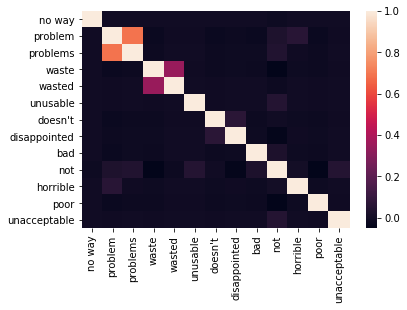

In [227]:
sns.heatmap(data_amz[keywords].corr())
plt.show()

SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables). 

We'll do that below under the titles data and target.

In [233]:
data = data_amz[keywords+ ['allcaps']]
target = data_amz['Sentiment']

In [234]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 333


In [122]:
type(y_pred)

numpy.ndarray

In [123]:
y_pred[:15]

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False])

In [221]:
data_amz.loc[data_amz['Sentiment']==True].head()

,Comment,Sentiment,no way,problem,problems,waste,wasted,unusable,doesn't,disappointed,bad,not,horrible,poor,unacceptable,allcaps,CommentLower
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"good case, excellent value."
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,great for the jawbone.
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,the mic is great.
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,if you are razr owner...you must have this!
10,And the sound quality is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,and the sound quality is great.


In [238]:
a = data_amz[['Comment','Sentiment']]
a = a.assign(y_pred=y_pred)
a.head(10)

,Comment,Sentiment,y_pred
0,So there is no way for me to plug it in here in the US unless I go by a converter.,False,False
1,"Good case, Excellent value.",True,True
2,Great for the jawbone.,True,True
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,False,True
4,The mic is great.,True,True
5,I have to jiggle the plug to get it to line up right to get decent volume.,False,True
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",False,True
7,If you are Razr owner...you must have this!,True,True
8,"Needless to say, I wasted my money.",False,False
9,What a waste of money and time!.,False,False


### Success Rate
Calculate the accuracy of your model here.

In [236]:
t = (target != y_pred).sum()
s = data_amz.shape[0]

success_rate = (1-t/s)*100
print('success_rate = ',success_rate,'%')

success_rate =  66.7 %


### Confusion Matrix
The next level of analysis of your classifier is often something called a Confusion Matrix. This is a matrix that shows the count of each possible permutation of target and prediction. So in our case, it will show the counts for when a message was ham and we predicted ham, when a message was ham and we predicted spam, when a message was spam and we predicted ham, and when a message was spam and we predicted spam.

SKLearn has a built in confusion matrix function, so let's quickly import that and generate one here.

### Here the [ Columns are <u>prediction</u> ] and the [ Rows are <u>actual</u> ].

In [259]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[192, 308],
       [ 25, 475]], dtype=int64)

Assuming that 308 = FP and 25 = FN:
308 out of 333(=308+25)) were predicted like Good(positive comment) but were actually bad.
25 out 333 were predicted Negative(0) comments which were actually Good(1)

In [257]:
# Convert y_pred to dataframe to count values
df_y_pred = pd.DataFrame(y_pred,columns=['y_pred'])
df_y_pred['y_pred'].value_counts()

True     783
False    217
Name: y_pred, dtype: int64

### Sensitivity: is the percentage of positives correctly identified
This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

= 475/500 = 95%

### Specificity: is just the opposite, the percentage of negatives correctly identified

= 192 / 500 = 38.4%

### test the classifier on one of the other datasets to see how well these kinds of classifiers translate from one context to another: IMDB

In [261]:
# Process the IMDB datafile:
data_imdb = pd.read_csv('U2-sentiment labelled sentences\\sentiment labelled sentences\\imdb_labelled.txt'
                       ,delimiter='\t',header=None)
# Sentiment: 1 (for positive) or 0 (for negative)
data_imdb.columns = ['Comment','Sentiment']
data_imdb.head(10)

,Comment,Sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0
6,Wasted two hours.,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the science teacher.,1


In [262]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    # I included a 'lower caps' method to get more checks...it seems that id did not have any effect!
    data_imdb[str(key)] = data_imdb['Comment'].str.lower().str.contains(
        str(key),
        case=False
    )
    
data_imdb['allcaps'] = data_imdb['Comment'].str.isupper() 

In [263]:
data_imdb['Sentiment'].value_counts()

1    386
0    362
Name: Sentiment, dtype: int64

In [264]:
data2 = data_imdb[keywords+ ['allcaps']]
target2 = data_imdb['Sentiment']

In [266]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 748 points : 271


In [267]:
confusion_matrix(target2, y_pred2)

array([[118, 244],
       [ 27, 359]], dtype=int64)

<b>Sensitivity</b>: is the percentage of positives correctly identified

= 359 / 386 = 93%